In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

<IPython.core.display.Javascript object>

In [3]:
events = pd.read_csv("data/web_events.csv")
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


<IPython.core.display.Javascript object>

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


<IPython.core.display.Javascript object>

In [5]:
events.isna().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
events["timestamp"] = pd.to_datetime(events["timestamp"], unit="ms")
events["timestamp"]

0         2015-06-02 05:02:12.117
1         2015-06-02 05:50:14.164
2         2015-06-02 05:13:19.827
3         2015-06-02 05:12:35.914
4         2015-06-02 05:02:17.106
                    ...          
2756096   2015-08-01 03:13:05.939
2756097   2015-08-01 03:30:13.142
2756098   2015-08-01 02:57:00.527
2756099   2015-08-01 03:08:50.703
2756100   2015-08-01 03:36:03.914
Name: timestamp, Length: 2756101, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [7]:
# extract different time values
events["Year"] = events["timestamp"].dt.year
events["Month"] = events["timestamp"].dt.month
events["Day"] = events["timestamp"].dt.day
events["Hour"] = events["timestamp"].dt.hour
events["Minute"] = events["timestamp"].dt.minute

<IPython.core.display.Javascript object>

In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   Year           int64         
 6   Month          int64         
 7   Day            int64         
 8   Hour           int64         
 9   Minute         int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 210.3+ MB


<IPython.core.display.Javascript object>

In [9]:
# Aggregate on each one, counting the number of records, 
# and see what insights you can discover for each type of event.
events.groupby('Year').agg('count')


,timestamp,visitorid,event,itemid,transactionid,Month,Day,Hour,Minute
Year,,,,,,,,,
2015,2756101,2756101,2756101,2756101,22457,2756101,2756101,2756101,2756101


<IPython.core.display.Javascript object>

In [10]:
events["event"].value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

<IPython.core.display.Javascript object>

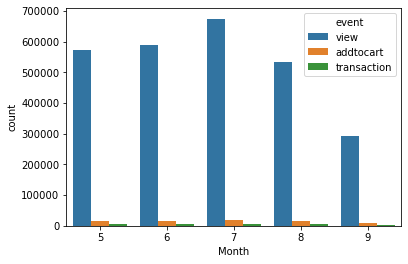

<IPython.core.display.Javascript object>

In [11]:
events[["Month", 'event']].groupby(['Month', "event"]).agg({'event': 'count'})
sns.countplot(x='Month', hue='event', data=events)


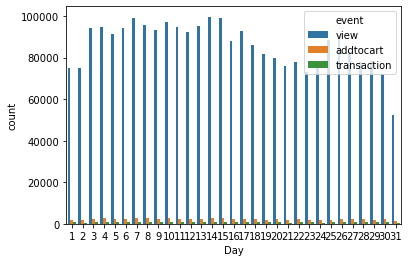

<IPython.core.display.Javascript object>

In [12]:
#event_counts_days = events[["Day", 'event']].groupby(['Day', "event"]).agg({'event': 'count'})
sns.countplot(x='Day', hue='event', data=events)


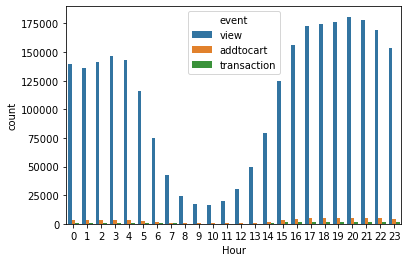

<IPython.core.display.Javascript object>

In [38]:
events[["Hour", "event"]].groupby(["Hour", "event"]).agg({"event": "count"})
sns.countplot(x='Hour', hue='event', data=events)


In [14]:
# Round datetimes by hour, aggregate, and see what insights you can discover.
events["timestamp"] = events["timestamp"].dt.round("H")

<IPython.core.display.Javascript object>

In [15]:
sales = events.loc[events["event"] == "transaction"]
sales["timestamp"].value_counts()

2015-05-14 17:00:00    48
2015-07-08 20:00:00    47
2015-05-14 18:00:00    44
2015-07-16 18:00:00    44
2015-07-15 17:00:00    42
                       ..
2015-08-26 10:00:00     1
2015-08-23 20:00:00     1
2015-09-13 08:00:00     1
2015-07-20 13:00:00     1
2015-09-13 05:00:00     1
Name: timestamp, Length: 2725, dtype: int64

<IPython.core.display.Javascript object>

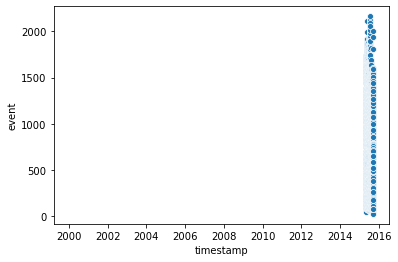

<IPython.core.display.Javascript object>

In [16]:
events_to_hour = events.groupby("timestamp").agg({"event": "count"})
sns.scatterplot(
    x=events_to_hour.index, y="event", data=events_to_hour,
)

In [17]:
# events_to_hour.index

<IPython.core.display.Javascript object>

Life Expectancy Data

In [18]:
life = pd.read_csv("data/life_expectancy.csv")
life.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [19]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            235 non-null    float64
 5   1961            236 non-null    float64
 6   1962            236 non-null    float64
 7   1963            235 non-null    float64
 8   1964            235 non-null    float64
 9   1965            236 non-null    float64
 10  1966            236 non-null    float64
 11  1967            236 non-null    float64
 12  1968            236 non-null    float64
 13  1969            236 non-null    float64
 14  1970            237 non-null    float64
 15  1971            236 non-null    float64
 16  1972            236 non-null    float64
 17  1973            237 non-null    flo

<IPython.core.display.Javascript object>

In [20]:
ids = life.select_dtypes("O")
melt_fields = life.select_dtypes("float64")

<IPython.core.display.Javascript object>

In [21]:
life_tall = pd.melt(
    life,
    id_vars=ids,
    value_vars=melt_fields,
    var_name="Year",
    value_name="life_expectancy",
)

<IPython.core.display.Javascript object>

In [22]:
life_tall

,Country Name,Country Code,Indicator Name,Indicator Code,Year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000


<IPython.core.display.Javascript object>

In [23]:
life_tall["Country Name"].value_counts()

Costa Rica            57
Tuvalu                57
Curacao               57
Russian Federation    57
Angola                57
                      ..
Australia             57
Tonga                 57
Puerto Rico           57
Korea, Rep.           57
Seychelles            57
Name: Country Name, Length: 264, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
life_tall[["Country Name", "life_expectancy"]].isna().groupby("Country Name")

<IPython.core.display.Javascript object>

In [25]:
countries = life_tall["Country Name"].unique()

<IPython.core.display.Javascript object>

In [26]:
life_tall.loc[life_tall["Country Name"] == "Zambia"]["life_expectancy"].isna().sum()

0

<IPython.core.display.Javascript object>

In [27]:
missing_countries = []
for country in countries:
    num_missing = (
        life_tall.loc[life_tall["Country Name"] == country]["life_expectancy"]
        .isna()
        .sum()
    )
    if num_missing > 0:
        missing_countries.append(country)

    print(f"{country}: {num_missing} nan's")
print(missing_countries)
print(len(missing_countries))

Aruba: 0 nan's
Afghanistan: 0 nan's
Angola: 0 nan's
Albania: 0 nan's
Andorra: 57 nan's
Arab World: 0 nan's
United Arab Emirates: 0 nan's
Argentina: 0 nan's
Armenia: 0 nan's
American Samoa: 57 nan's
Antigua and Barbuda: 0 nan's
Australia: 0 nan's
Austria: 0 nan's
Azerbaijan: 0 nan's
Burundi: 0 nan's
Belgium: 0 nan's
Benin: 0 nan's
Burkina Faso: 0 nan's
Bangladesh: 0 nan's
Bulgaria: 0 nan's
Bahrain: 0 nan's
Bahamas, The: 0 nan's
Bosnia and Herzegovina: 0 nan's
Belarus: 0 nan's
Belize: 0 nan's
Bermuda: 36 nan's
Bolivia: 0 nan's
Brazil: 0 nan's
Barbados: 0 nan's
Brunei Darussalam: 0 nan's
Bhutan: 0 nan's
Botswana: 0 nan's
Central African Republic: 0 nan's
Canada: 0 nan's
Central Europe and the Baltics: 0 nan's
Switzerland: 0 nan's
Channel Islands: 0 nan's
Chile: 0 nan's
China: 0 nan's
Cote d'Ivoire: 0 nan's
Cameroon: 0 nan's
Congo, Dem. Rep.: 0 nan's
Congo, Rep.: 0 nan's
Colombia: 0 nan's
Comoros: 0 nan's
Cabo Verde: 0 nan's
Costa Rica: 0 nan's
Caribbean small states: 0 nan's
Cuba: 0 nan's

<IPython.core.display.Javascript object>

In [28]:
life_tall.isna().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
Year                  0
life_expectancy    1301
dtype: int64

<IPython.core.display.Javascript object>

In [29]:
life_tall

,Country Name,Country Code,Indicator Name,Indicator Code,Year,life_expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,65.662000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.292000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,33.251000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.279000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
...,...,...,...,...,...,...
15043,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,71.646341
15044,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,64.953000
15045,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,62.774000
15046,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,61.874000


<IPython.core.display.Javascript object>

In [30]:
life_tall.loc[life_tall["Country Name"] == "Andorra"]["life_expectancy"].isna().sum()

57

<IPython.core.display.Javascript object>

In [31]:
life_tall.loc[life_tall["life_expectancy"].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,Year,life_expectancy
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
25,Bermuda,BMU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
49,Curacao,CUW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
50,Cayman Islands,CYM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,NaN
...,...,...,...,...,...,...
14994,San Marino,SMR,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,NaN
15007,Sint Maarten (Dutch part),SXM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,NaN
15010,Turks and Caicos Islands,TCA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,NaN
15027,Tuvalu,TUV,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2016,NaN


<IPython.core.display.Javascript object>

In [32]:
life_clean = life_tall.copy()
filled_countries = []
for country in missing_countries:
    if (
        life_clean.loc[life_clean["Country Name"] == country]["life_expectancy"]
        .isna()
        .sum()
        >= 28
    ):
        life_clean = life_clean.drop(
            index=life_clean.loc[life_clean["Country Name"] == country].index
        )
        continue
    life_clean.loc[life_tall["Country Name"] == country] = life_clean.loc[
        life_clean["Country Name"] == country
    ].fillna(method="ffill")
    life_clean.loc[life_tall["Country Name"] == country] = life_clean.loc[
        life_clean["Country Name"] == country
    ].fillna(method="bfill")
    filled_countries.append(country)
print(filled_countries)

['Faroe Islands', 'Greenland', 'Israel', 'St. Martin (French part)', 'Seychelles', 'Kosovo']


<IPython.core.display.Javascript object>

In [33]:
missing_countries = []
for country in countries:
    num_missing = (
        life_clean.loc[life_clean["Country Name"] == country]["life_expectancy"]
        .isna()
        .sum()
    )
    if num_missing > 0:
        missing_countries.append(country)

    print(f"{country}: {num_missing} nan's")
print(missing_countries)

Aruba: 0 nan's
Afghanistan: 0 nan's
Angola: 0 nan's
Albania: 0 nan's
Andorra: 0 nan's
Arab World: 0 nan's
United Arab Emirates: 0 nan's
Argentina: 0 nan's
Armenia: 0 nan's
American Samoa: 0 nan's
Antigua and Barbuda: 0 nan's
Australia: 0 nan's
Austria: 0 nan's
Azerbaijan: 0 nan's
Burundi: 0 nan's
Belgium: 0 nan's
Benin: 0 nan's
Burkina Faso: 0 nan's
Bangladesh: 0 nan's
Bulgaria: 0 nan's
Bahrain: 0 nan's
Bahamas, The: 0 nan's
Bosnia and Herzegovina: 0 nan's
Belarus: 0 nan's
Belize: 0 nan's
Bermuda: 0 nan's
Bolivia: 0 nan's
Brazil: 0 nan's
Barbados: 0 nan's
Brunei Darussalam: 0 nan's
Bhutan: 0 nan's
Botswana: 0 nan's
Central African Republic: 0 nan's
Canada: 0 nan's
Central Europe and the Baltics: 0 nan's
Switzerland: 0 nan's
Channel Islands: 0 nan's
Chile: 0 nan's
China: 0 nan's
Cote d'Ivoire: 0 nan's
Cameroon: 0 nan's
Congo, Dem. Rep.: 0 nan's
Congo, Rep.: 0 nan's
Colombia: 0 nan's
Comoros: 0 nan's
Cabo Verde: 0 nan's
Costa Rica: 0 nan's
Caribbean small states: 0 nan's
Cuba: 0 nan's
Cu

<IPython.core.display.Javascript object>

In [34]:
life_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13737 entries, 0 to 15047
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     13737 non-null  object 
 1   Country Code     13737 non-null  object 
 2   Indicator Name   13737 non-null  object 
 3   Indicator Code   13737 non-null  object 
 4   Year             13737 non-null  object 
 5   life_expectancy  13737 non-null  float64
dtypes: float64(1), object(5)
memory usage: 751.2+ KB


<IPython.core.display.Javascript object>

For interpolation, it appeared some countries were missing all or most entries. If a country was missing over half of it's entries, it was dropped. The remaining countries with missing life expectancy were then first front filled to prioritize not introducing future data into the past. Then back filling was done, since this would account for missing values with no other values preceding it. Measures of central tendency were not used, but could be instead of backfilling. It is important to note that the data was subset by country before interpolating. Only 6 of the 29 countries with missing values were kept and interpolated. Choosiung a narrower time span may allow for keeping more data without compromising the integrity as much as filling in decades of missing values.

In [35]:
life_tall["Country Name"].nunique()

264

<IPython.core.display.Javascript object>

In [36]:
life_clean["Country Name"].nunique()

241

<IPython.core.display.Javascript object>

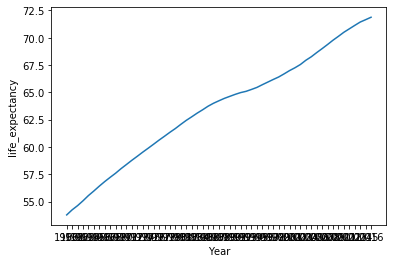

<IPython.core.display.Javascript object>

In [37]:
avg_lifeexp_year = life_clean.groupby("Year").agg({"life_expectancy": "mean"})
sns.lineplot(x=avg_lifeexp_year.index, y="life_expectancy", data=avg_lifeexp_year)
plt.show()